In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [12]:
ames = pd.read_csv('./datasets/train.csv')

In [13]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

# DATA QUALITIES

In [14]:
ames.shape

(2051, 81)

In [15]:
ames.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [16]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [17]:
ames.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [18]:
num_col_names = ames._get_numeric_data().columns 
ames[num_col_names]= ames[num_col_names].fillna(0)

In [19]:
categ_col_names = ames.columns[ames.dtypes==object]
ames[categ_col_names] = ames[categ_col_names].fillna('Unknown')

In [20]:
num_data_df = ames[num_col_names]

In [21]:
categ_data_df = ames[categ_col_names]

In [22]:
ames_df = pd.concat([num_data_df, categ_data_df], axis=1)

In [23]:
ames_df.shape

(2051, 81)

In [24]:
ames.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1868.725987,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,454.133654,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [25]:
two_std = 2 * 79258.659352

# Histogram of SalePrice is skewed. Apply log to predictions when modelling.

C:\Users\Michelle\Anaconda3\envs\dsi\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


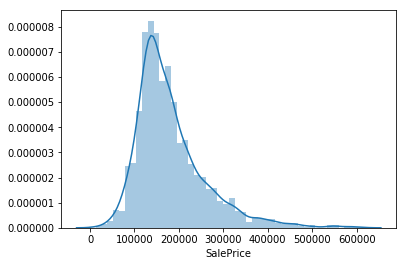

In [26]:
sns.distplot(ames_df['SalePrice'])

# Numerical Features Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7C302C048>,
      dtype=object)

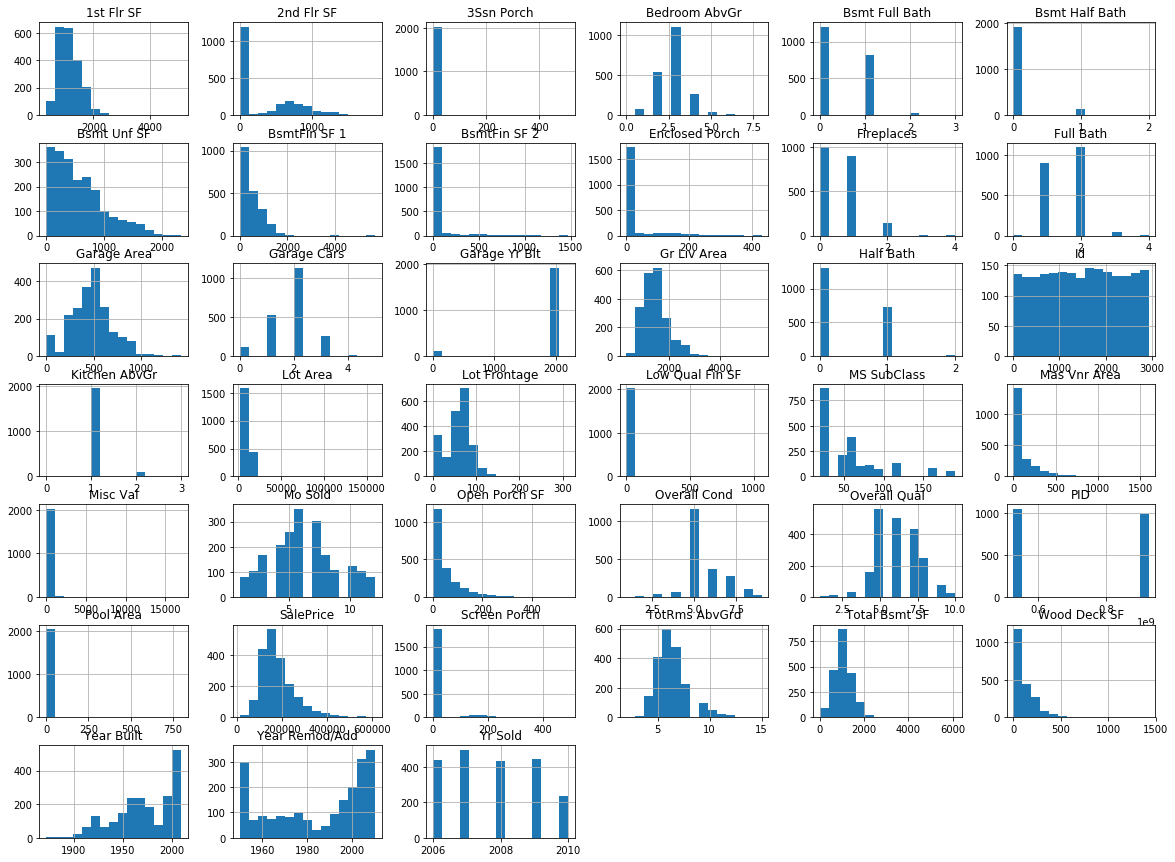

In [27]:
ames.hist(bins=15, figsize=(20,15))

# Numerical Interaction Features

In [28]:
ames_df['house_age'] = ames_df['Yr Sold'] - ames_df['Year Built']

In [29]:
ames_df['total_fin_sq_ft'] = ames_df['1st Flr SF'] + ames_df['2nd Flr SF'] + ames_df['BsmtFin SF 1'] + ames_df['BsmtFin SF 2']

In [30]:
ames_df['garage_size'] = ames_df['Garage Area'] * ames_df['Garage Cars']

In [31]:
ames_df['overall_grade'] = ames_df['Overall Qual'] + ames_df['Overall Cond']

# Dummy Data Features

In [32]:
ames_df = pd.get_dummies(ames_df, columns=['Year Built',
                                           'Year Remod/Add',
                                           'Garage Yr Blt',
                                           'Mo Sold',
                                           'Yr Sold'], drop_first=True)

# Numerical Features Correlation

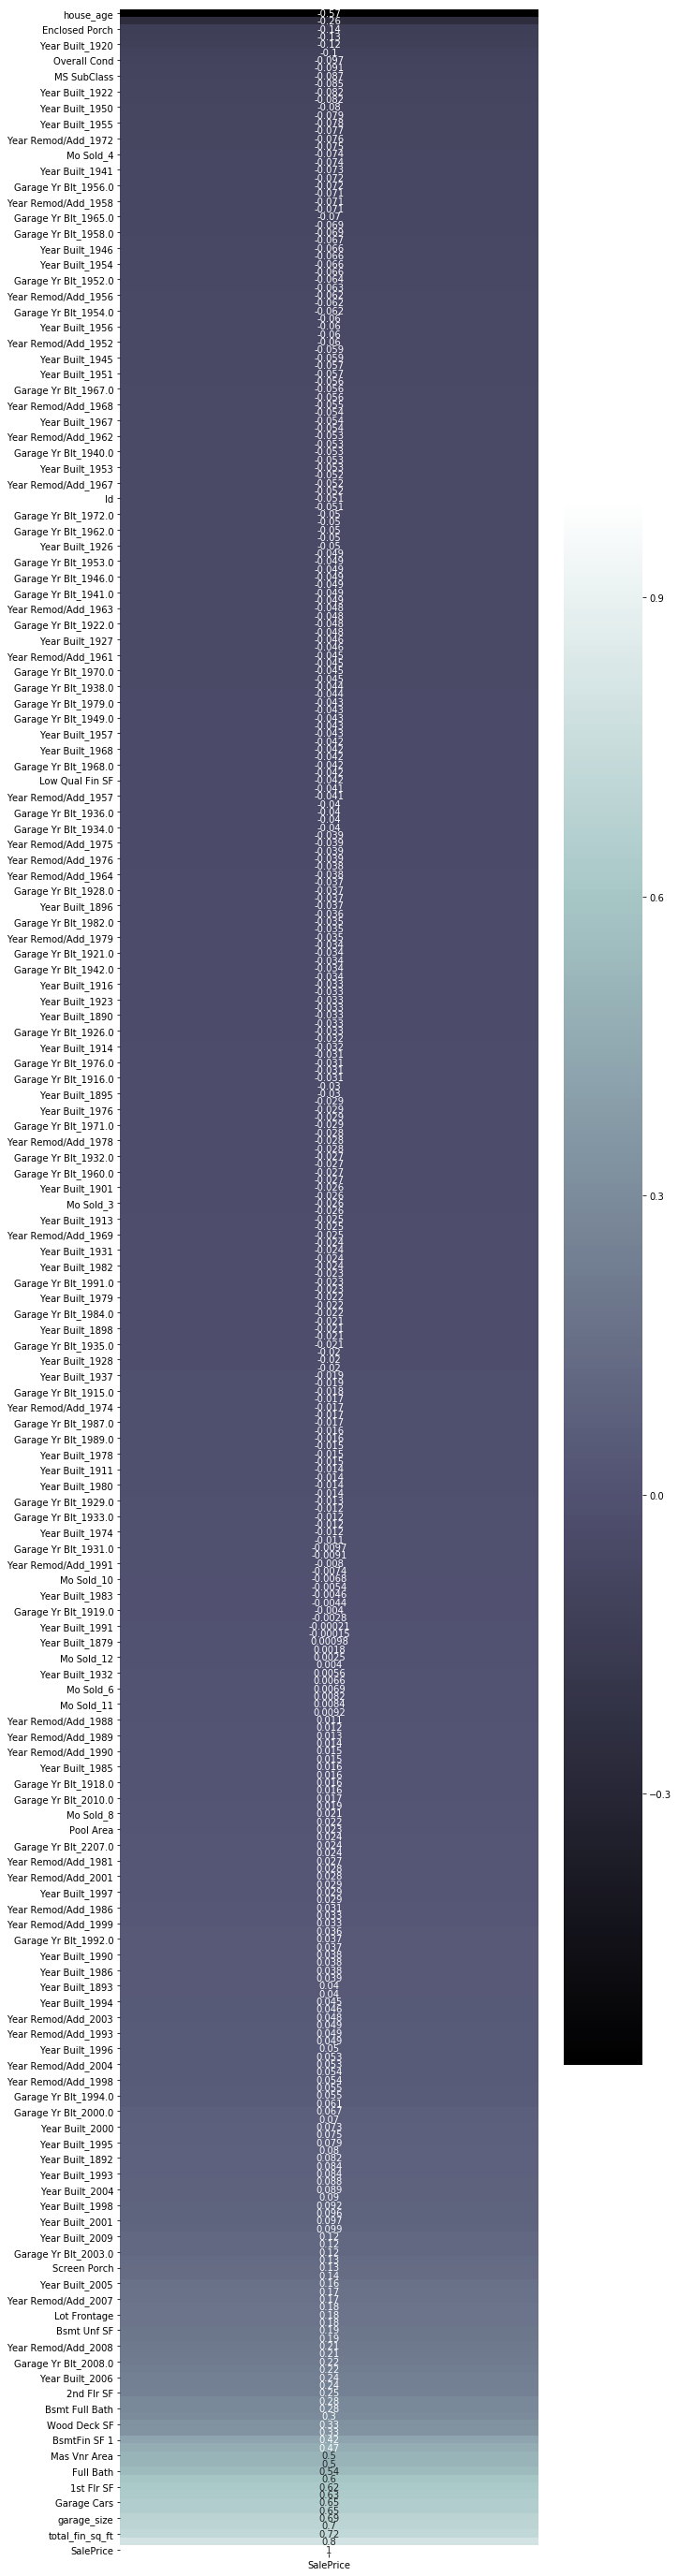

In [33]:
plt.figure(figsize=(10,50))
sns.heatmap(ames_df.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap='bone')

# Categorical Features with Large Variance in Median Price

In [34]:
x = ames.groupby(['MS Zoning']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

171318.31683168316


In [35]:
x = ames.groupby(['Street']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [36]:
x = ames.groupby(['Alley']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [37]:
x = ames.groupby(['Lot Shape']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [38]:
x = ames.groupby(['Land Contour']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [39]:
x = ames.groupby(['Utilities']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [40]:
x = ames.groupby(['Lot Config']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [41]:
x = ames.groupby(['Land Slope']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [42]:
x = ames.groupby(['Neighborhood']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

229444.48684210528


In [43]:
x = ames.groupby(['Condition 1']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [44]:
x = ames.groupby(['Condition 2']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

298916.6666666667


In [45]:
x = ames.groupby(['Bldg Type']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [46]:
x = ames.groupby(['House Style']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [47]:
x = ames.groupby(['Roof Style']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [48]:
x = ames.groupby(['Roof Matl']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

179400.0


In [49]:
x = ames.groupby(['Exterior 1st']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

179625.0


In [50]:
x = ames.groupby(['Exterior 2nd']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [51]:
x = ames.groupby(['Mas Vnr Type']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [52]:
x = ames.groupby(['Exter Qual']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

284659.11633428297


In [53]:
x = ames.groupby(['Exter Cond']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

191463.85714285713


In [54]:
x = ames.groupby(['Foundation']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [55]:
x = ames.groupby(['Bsmt Qual']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

240506.6195652174


In [56]:
x = ames.groupby(['Bsmt Cond']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [57]:
x = ames.groupby(['Bsmt Exposure']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

159974.65270935962


In [58]:
x = ames.groupby(['BsmtFin Type 1']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [59]:
x = ames.groupby(['BsmtFin Type 2']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [60]:
x = ames.groupby(['Heating']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [61]:
x = ames.groupby(['Heating QC']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [62]:
x = ames.groupby(['Central Air']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [63]:
x = ames.groupby(['Electrical']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [64]:
x = ames.groupby(['Kitchen Qual']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

235089.5061293504


In [65]:
x = ames.groupby(['Functional']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [66]:
x = ames.groupby(['Fireplace Qu']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

192217.51612903227


In [67]:
x = ames.groupby(['Garage Type']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [68]:
x = ames.groupby(['Garage Finish']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [69]:
x = ames.groupby(['Garage Qual']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

197989.27777777775


In [70]:
x = ames.groupby(['Garage Cond']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [71]:
x = ames.groupby(['Paved Drive']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [72]:
x = ames.groupby(['Pool QC']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

173500.0


In [73]:
x = ames.groupby(['Fence']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [74]:
x = ames.groupby(['Misc Feature']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


In [75]:
x = ames.groupby(['Sale Type']).describe()
med_price_range = (x['SalePrice']['mean']).sort_values().max()-(x['SalePrice']['mean']).sort_values().min()
if med_price_range > two_std:
    print(med_price_range)
else:
    print('drop feature')

drop feature


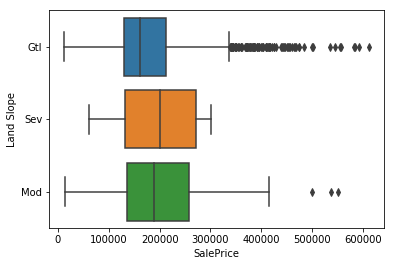

In [76]:
sns.boxplot(x=ames_df['SalePrice'], y=ames_df['Land Slope'])
plt.savefig('./Land_Slope.png')

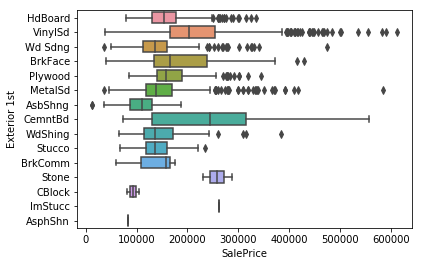

In [77]:
sns.boxplot( x=ames["SalePrice"], y=ames['Exterior 1st'] )
plt.savefig('./Exterior_1st.png')

# Dummy Categorical Features that Will be Used in Model

In [78]:
ames_df = pd.get_dummies(ames_df, columns=['MS Zoning',
                                           'Neighborhood',
                                           'Condition 2',
                                           'Roof Matl',
                                           'Exterior 1st',
                                           'Exter Qual',
                                           'Exter Cond',
                                           'Bsmt Qual',
                                           'Bsmt Exposure',
                                           'Kitchen Qual',
                                           'Fireplace Qu',
                                           'Garage Qual'], drop_first=True)

ames_df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Bldg Type,House Style,Roof Style,Exterior 2nd,Mas Vnr Type,Foundation,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Functional,Garage Type,Garage Finish,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,house_age,total_fin_sq_ft,garage_size,overall_grade,Year Built_1875,Year Built_1879,Year Built_1880,Year Built_1885,Year Built_1890,Year Built_1892,Year Built_1893,Year Built_1895,Year Built_1896,Year Built_1898,Year Built_1900,Year Built_1901,Year Built_1905,Year Built_1908,Year Built_1910,Year Built_1911,Year Built_1912,Year Built_1913,Year Built_1914,Year Built_1915,Year Built_1916,Year Built_1917,Year Built_1918,Year Built_1919,Year Built_1920,Year Built_1921,Year Built_1922,Year Built_1923,Year Built_1924,Year Built_1925,Year Built_1926,Year Built_1927,Year Built_1928,Year Built_1929,Year Built_1930,Year Built_1931,Year Built_1932,Year Built_1934,Year Built_1935,Year Built_1936,Year Built_1937,Year Built_1938,Year Built_1939,Year Built_1940,Year Built_1941,Year Built_1942,Year Built_1945,Year Built_1946,Year Built_1947,Year Built_1948,Year Built_1949,Year Built_1950,Year Built_1951,Year Built_1952,Year Built_1953,Year Built_1954,Year Built_1955,Year Built_1956,Year Built_1957,Year Built_1958,Year Built_1959,Year Built_1960,Year Built_1961,Year Built_1962,Year Built_1963,Year Built_1964,Year Built_1965,Year Built_1966,Year Built_1967,Year Built_1968,Year Built_1969,Year Built_1970,Year Built_1971,Year Built_1972,Year Built_1973,Year Built_1974,Year Built_1975,Year Built_1976,Year Built_1977,Year Built_1978,Year Built_1979,Year Built_1980,Year Built_1981,Year Built_1982,Year Built_1983,Year Built_1984,Year Built_1985,Year Built_1986,Year Built_1987,Year Built_1988,Year Built_1989,Year Built_1990,Year Built_1991,Year Built_1992,Year Built_1993,Year Built_1994,Year Built_1995,Year Built_1996,Year Built_1997,Year Built_1998,Year Built_1999,Year Built_2000,Year Built_2001,Year Built_2002,Year Built_2003,Year Built_2004,Year Built_2005,Year Built_2006,Year Built_2007,Year Built_2008,Year Built_2009,Year Built_2010,Year Remod/Add_1951,Year Remod/Add_1952,Year Remod/Add_1953,Year Remod/Add_1954,Year Remod/Add_1955,Year Remod/Add_1956,Year Remod/Add_1957,Year Remod/Add_1958,Year Remod/Add_1959,Year Remod/Add_1960,Year Remod/Add_1961,Year Remod/Add_1962,Year Remod/Add_1963,Year Remod/Add_1964,Year Remod/Add_1965,Year Remod/Add_1966,Year Remod/Add_1967,Year Remod/Add_1968,Year Remod/Add_1969,Year Remod/Add_1970,Year Remod/Add_1971,Year Remod/Add_1972,Year Remod/Add_1973,Year Remod/Add_1974,Year Remod/Add_1975,Year Remod/Add_1976,Year Remod/Add_1977,Year Remod/Add_1978,Year Remod/Add_1979,Year Remod/Add_1980,Year Remod/Add_1981,Year Remod/Add_1982,Year Remod/Add_1983,Year Remod/Add_1984,Year Remod/Add_1985,Year Remod/Add_1986,Year Remod/Add_1987,Year Remod/Add_1988,Year Remod/Add_1989,Year Remod/Add_1990,Year Remod/Add_1991,Year Remod/Add_1992,Year Remod/Add_1993,Year Remod/Add_1994,Year Remod/Add_1995,Year Remod/Add_1996,Year Remod/Add_1997,Year Remod/Add_1998,Year Remod/Add_1999,Year Remod/Add_2000,Year Remod/Add_2001,Year Remod/Add_2002,Year Remod/Add_2003,Year Remod/Add_2004,Year Remod/Add_2005,Year Remod/Add_2006,Year Remod/Add_2007,Year Remod/Add_2008,Year Remod/Add_2009,Year Remod/Add_2010,Garage Yr Blt_1895.0,Garage Yr Blt_1896.0,Garage Yr Blt_1900.0,Garage Yr Blt_1910.0,Garage Yr Blt_1914.0,Garage Yr Blt_1915.0,Garage Yr Blt_1916.0,Garage Yr Blt_1917.0,Garage Yr Blt_1918.0,Garage Yr Blt_1919.0,Garage Yr B

In [79]:
ames_df.shape

(2051, 443)

# Drop Categorical Features that Will NOT be Used in Model

In [80]:
ames_df.drop(['Street',
             'Alley',
             'Lot Shape',
             'Land Contour',
             'Utilities',
             'Lot Config',
             'Land Slope',
             'Condition 1',
             'Bldg Type',
             'House Style',
             'Roof Style',
             'Exterior 2nd',
             'Mas Vnr Type',
             'Foundation',
             'Bsmt Cond',
             'BsmtFin Type 1',
             'BsmtFin Type 2',
             'Heating',
             'Heating QC',
             'Central Air',
             'Electrical',
             'Functional',
             'Garage Type',
             'Garage Finish',
             'Garage Cond',
             'Paved Drive',
             'Pool QC',
             'Fence',
             'Misc Feature',
             'Sale Type'], axis=1, inplace=True)

# New DataFrame Qualities

In [81]:
ames_df.shape

(2051, 413)

In [82]:
type(ames_df)

pandas.core.frame.DataFrame

In [83]:
ames_df.dtypes

Id                         int64
PID                        int64
MS SubClass                int64
Lot Frontage             float64
Lot Area                   int64
Overall Qual               int64
Overall Cond               int64
Mas Vnr Area             float64
BsmtFin SF 1             float64
BsmtFin SF 2             float64
Bsmt Unf SF              float64
Total Bsmt SF            float64
1st Flr SF                 int64
2nd Flr SF                 int64
Low Qual Fin SF            int64
Gr Liv Area                int64
Bsmt Full Bath           float64
Bsmt Half Bath           float64
Full Bath                  int64
Half Bath                  int64
Bedroom AbvGr              int64
Kitchen AbvGr              int64
TotRms AbvGrd              int64
Fireplaces                 int64
Garage Cars              float64
Garage Area              float64
Wood Deck SF               int64
Open Porch SF              int64
Enclosed Porch             int64
3Ssn Porch                 int64
Screen Por

In [84]:
features = list(ames_df.columns)

In [85]:
features = [feature for feature in features if feature not in ['SalePrice', 'Id', 'PID']]

In [86]:
'SalePrice' in features

False

In [87]:
'Id' in features

False

In [88]:
'PID' in features

False

In [89]:
X = ames_df[features]
y = ames_df['SalePrice']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [91]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [92]:
lr = LinearRegression()

lasso = LassoCV()

ridge = RidgeCV()

In [93]:
lr.fit(X_train_scaled, y_train);

In [94]:
ridge.fit(X_train_scaled, y_train);

In [95]:
lasso.fit(X_train_scaled, y_train);

In [96]:
cross_val_score(lr, X_train_scaled, y_train, cv=5).mean()

-1.515885813928663e+25

In [97]:
cross_val_score(ridge, X_train_scaled, y_train, cv=5).mean()

0.752020675754328

In [98]:
cross_val_score(lasso, X_train_scaled, y_train, cv=5).mean()

0.8242453635728844

In [99]:
lr.score(X_train_scaled, y_train)

0.937556947016988

In [100]:
lr.score(X_test_scaled, y_test)

-1.1731971079913591e+21

In [101]:
ridge.score(X_train_scaled, y_train)

0.9351073027711895

In [102]:
ridge.score(X_test_scaled, y_test)

0.8741537280823408

In [103]:
lasso.score(X_train_scaled, y_train)

0.8897174607263378

In [104]:
lasso.score(X_test_scaled, y_test)

0.9035302861767349

In [105]:
train_pred_lr = lr.predict(X_train_scaled)

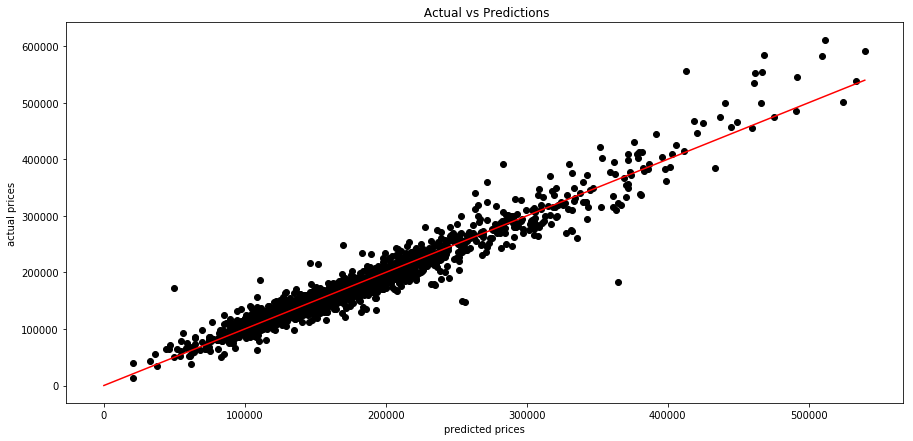

In [106]:
plt.figure(figsize=(15,7))

plt.scatter(train_pred_lr,y_train, c='k')
plt.xlabel('predicted prices')
plt.ylabel('actual prices')
plt.title(' Actual vs Predictions')

plt.plot( [0, np.max(train_pred_lr)], [0, np.max(train_pred_lr)], c = 'r')
plt.savefig('./Exterior_1st.png')